# Proyek Analisis Data: Bike Sharing

- Nama: Besar Rachmat Ikhsan Pambudi
- Email: besarrahmat007@gmail.com
- ID Dicoding: besarrahmat


## Pertanyaan Bisnis

1. Bagaimana Tren Jumlah Pengguna Layanan Bike-Sharing dalam Beberapa Tahun Terakhir?
2. Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu dalam Sehari?
3. Apakah Terdapat Korelasi Antara Suhu dengan Jumlah Pengguna Layanan Bike-Sharing?


## Persiapan


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Gathering Data


In [2]:
df = pd.read_csv("data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Karakteristik Dataset

- instant: index data
- dteday: tanggal
- season: musim (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 to 12)
- hr: jam (0 to 23)
- holiday: hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday: hari
- workingday: jika hari tersebut bukan akhir pekan atau hari libur maka bernilai 1, jika tidak maka bernilai 0

* weathersit:
  - 1: Cerah, Sedikit awan, Berawan sebagian
  - 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan
  - 3: Salju ringan, Hujan ringan + Badai petir + Awan bertebaran, Hujan ringan + Awan bertebaran
  - 4: Hujan lebat + Butiran es + Badai petir + Kabut, Salju + Kabut

- temp: Suhu yang telah dinormalisasi dalam Celsius. Nilainya dibagi menjadi 41 (max)
- atemp: Suhu yang dirasakan yang telah dinormalisasi dalam Celsius. Nilainya dibagi menjadi 50 (max)
- hum: Kelembaban yang telah dinormalisasi. Nilainya dibagi menjadi 100 (max)
- windspeed: Kecepatan angin yang telah dinormalisasi. Nilainya dibagi menjadi 67 (max)
- casual: Jumlah pengguna kasual
- registered: Jumlah pengguna terdaftar
- cnt: Jumlah total sepeda sewaan, termasuk yang kasual dan terdaftar


## Assessing Data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Data type** = Terdapat kesalahan tipe data untuk kolom `dteday`. <br />
**_Innacurate value_** = Sesuai karakteristik dataset, variabel `season`, `mnth`, dan `weekday` direpresentasikan dalam integer, serta variabel `yr` direpresentasikan dalam 0 dan 1 akan diubah menjadi tipe data dan nilai yang sesuai.


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**_Inaccurate value_** = Sesuai karakteristik dataset, variabel `temp`, `atemp`, `hum`, dan `windspeed` telah dinormalisasi. Sehingga untuk mendapatkan pemahaman yang lebih baik tentang kondisi nyata, maka akan dikembalikan nilai dari variabel-variabel tersebut ke kondisi sebelum dinormalisasi.


## Cleaning Data


**Data type**


In [7]:
df["dteday"] = pd.to_datetime(df["dteday"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**_Inaccurate value_**


In [9]:
def find_season(season):
    season_string = {
        1: "Winter",
        2: "Spring",
        3: "Summer",
        4: "Fall",
    }

    return season_string.get(season)


season_list = []

for season in df["season"]:
    season_list.append(find_season(season))

df["season"] = season_list

In [10]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [11]:
df["mnth"] = df["dteday"].dt.month_name()

In [12]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [13]:
df["weekday"] = df["dteday"].dt.day_name()

In [14]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [15]:
df["yr"] = df["dteday"].dt.year

In [16]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [17]:
df["temp"] = df["temp"] * 41
df["atemp"] = df["atemp"] * 50
df["hum"] = df["hum"] * 100
df["windspeed"] = df["windspeed"] * 67

In [18]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)


In [19]:
float_vars = ["temp", "atemp", "hum", "windspeed"]
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


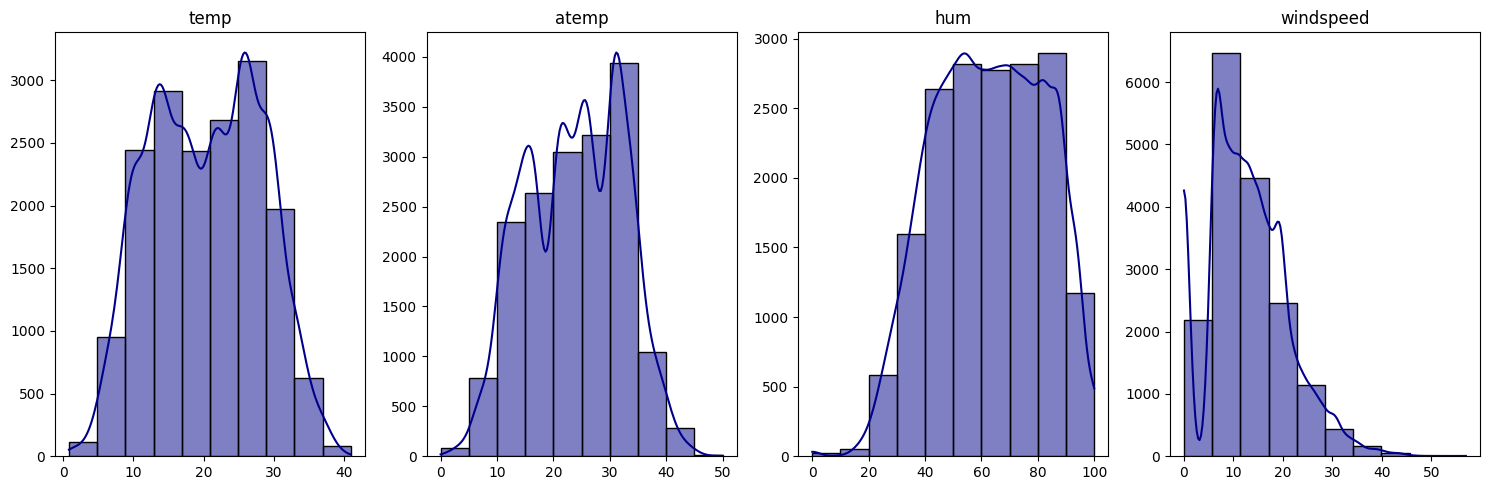

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    sns.histplot(
        x=df[float_vars[i]],
        ax=ax,
        kde=True,
        bins=10,  # type: ignore
        color="darkblue",
    )

    ax.set_title(float_vars[i])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.tight_layout()
plt.show()

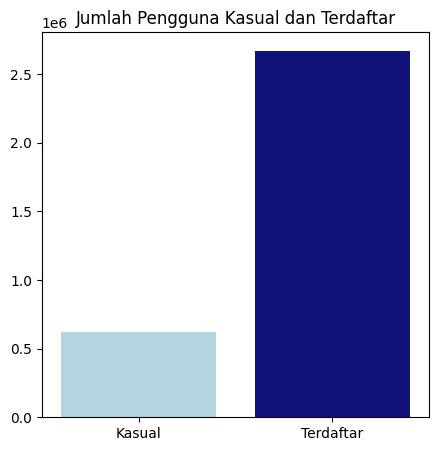

In [21]:
casual_sum = df["casual"].sum()
registered_sum = df["registered"].sum()

plt.figure(figsize=(5, 5))

sns.barplot(
    x=["Kasual", "Terdaftar"],
    y=[casual_sum, registered_sum],
    hue=["Kasual", "Terdaftar"],
    palette=["lightblue", "darkblue"],
)
plt.title("Jumlah Pengguna Kasual dan Terdaftar")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.show()

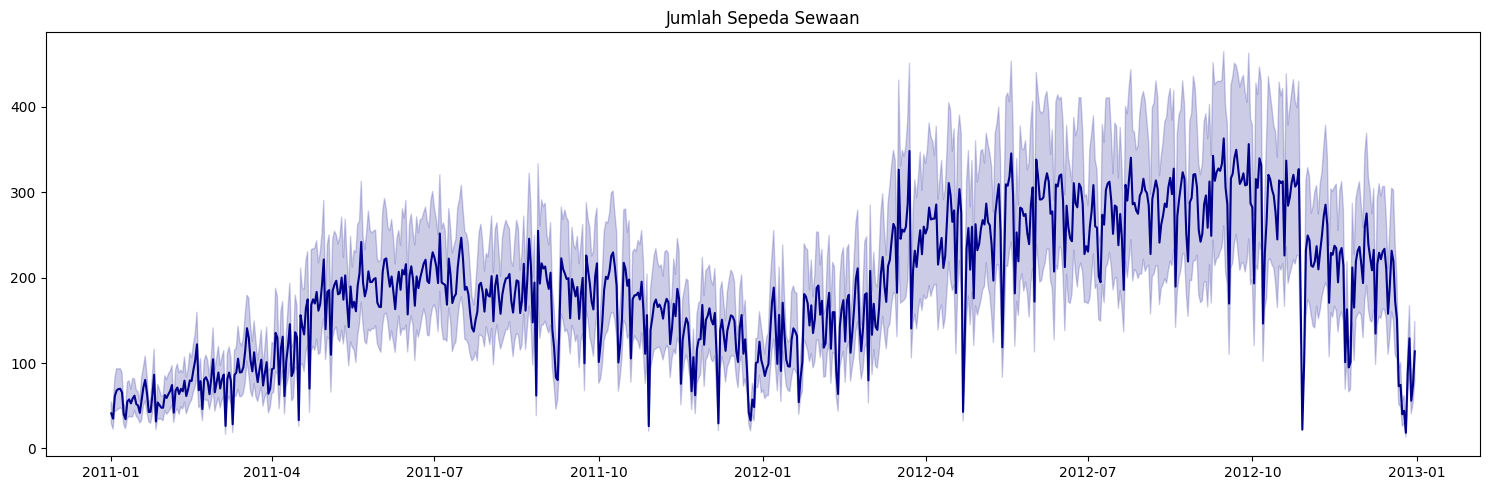

In [22]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=df,
    x="dteday",
    y="cnt",
    color="darkblue",
)
plt.title("Jumlah Sepeda Sewaan")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.tight_layout()
plt.show()

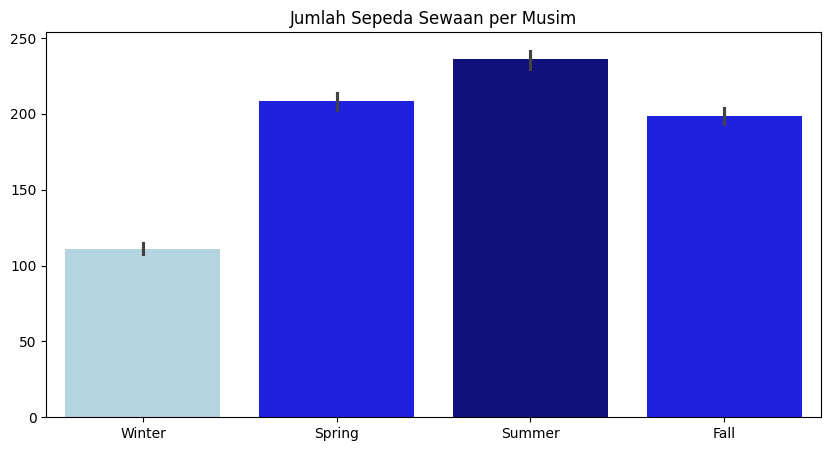

In [23]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=df,
    x="season",
    y="cnt",
    hue="season",
    palette=["lightblue", "blue", "darkblue", "blue"],
)
plt.title("Jumlah Sepeda Sewaan per Musim")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.show()

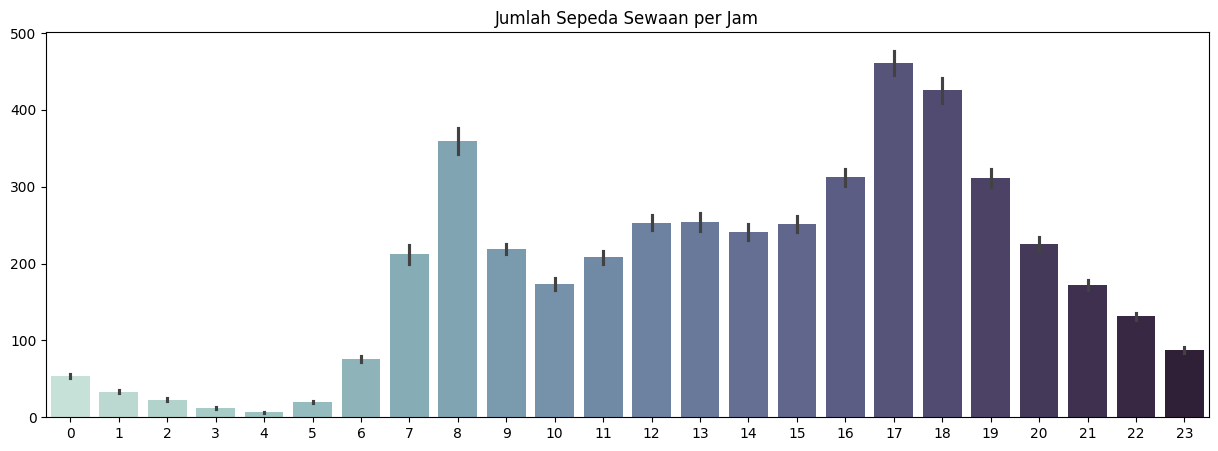

In [24]:
plt.figure(figsize=(15, 5))

sns.barplot(
    data=df,
    x="hr",
    y="cnt",
    hue="hr",
    palette=sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True),  # type: ignore
    legend=False,  # type: ignore
)
plt.title("Jumlah Sepeda Sewaan per Jam")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.show()

In [25]:
scatter_vars = ["cnt", "temp", "atemp", "hum", "windspeed"]
df_scatter = df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


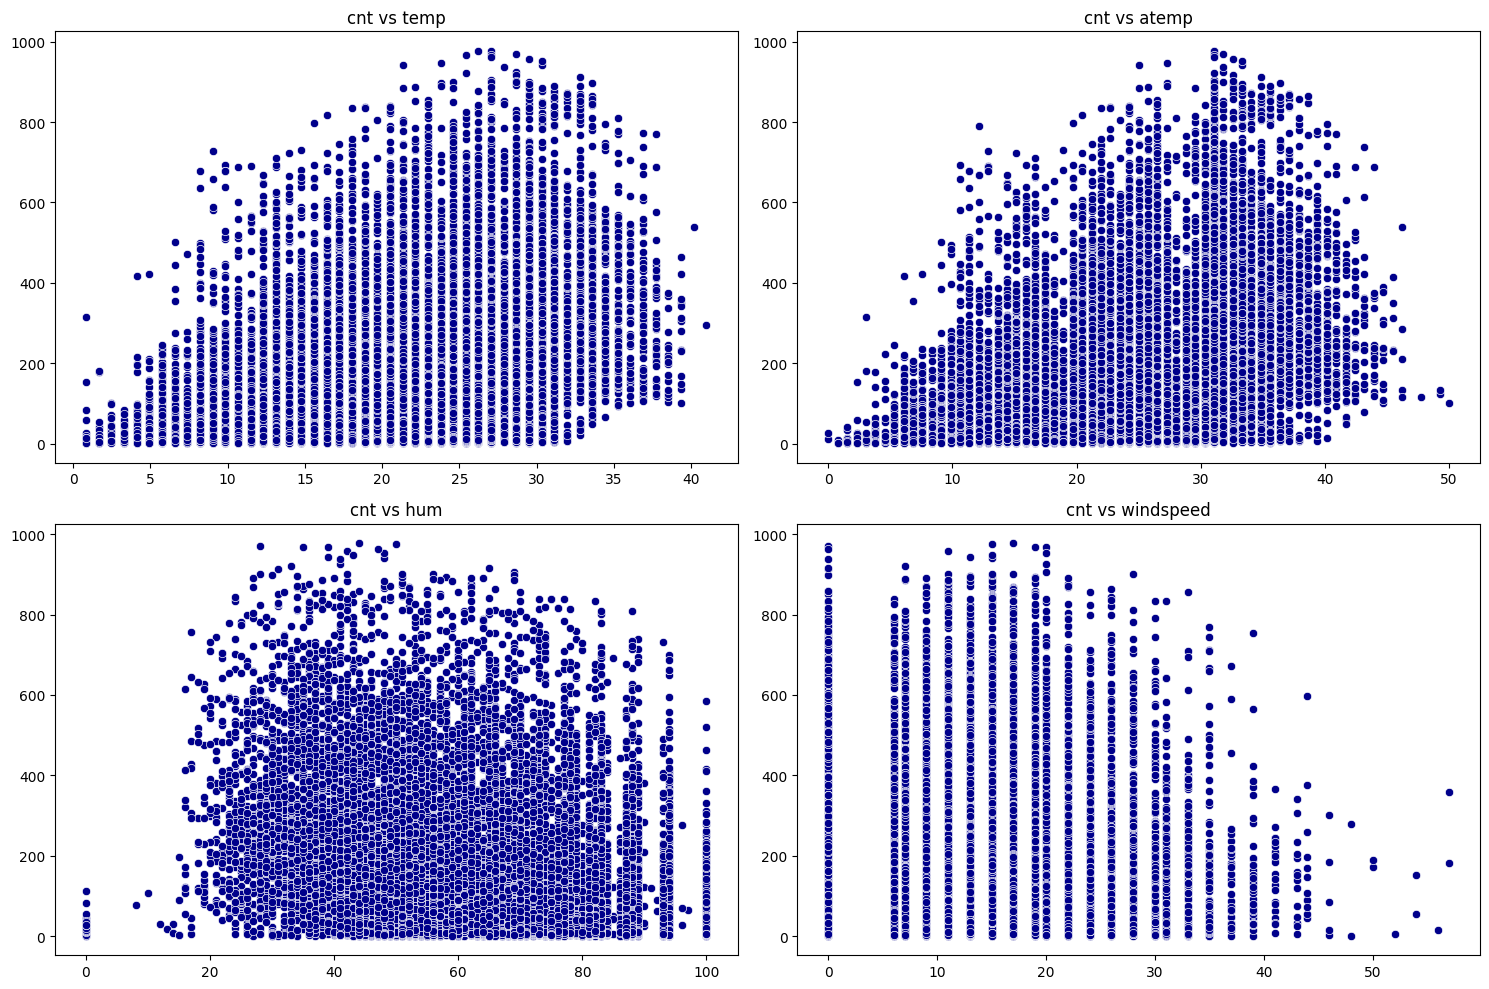

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(df.columns[10:14]):
    sns.scatterplot(
        data=df,
        x=col,
        y="cnt",
        ax=axs[i // 2, i % 2],
        color="darkblue",
    )

    axs[i // 2, i % 2].set_title(f"cnt vs {col}")
    axs[i // 2, i % 2].set_xlabel(None)  # type: ignore
    axs[i // 2, i % 2].set_ylabel(None)  # type: ignore

plt.tight_layout()
plt.show()

## Data Visualization


1. Bagaimana Tren Jumlah Pengguna Layanan Bike-Sharing dalam Beberapa Tahun Terakhir?


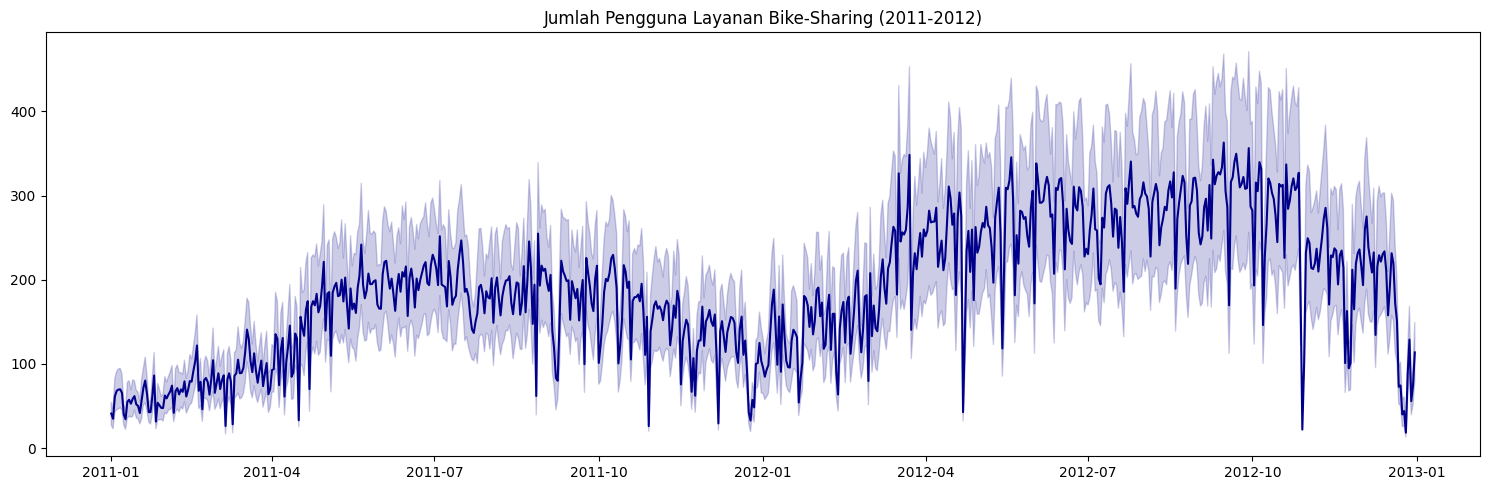

In [27]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=df,
    x="dteday",
    y="cnt",
    color="darkblue",
)
plt.title("Jumlah Pengguna Layanan Bike-Sharing (2011-2012)")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.tight_layout()
plt.show()

In [28]:
monthly_users_df = df.resample(
    rule="M",
    on="dteday",
).agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)
monthly_users_df.index = monthly_users_df.index.strftime("%b-%y")  # type: ignore
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={"dteday": "yearmonth"})
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


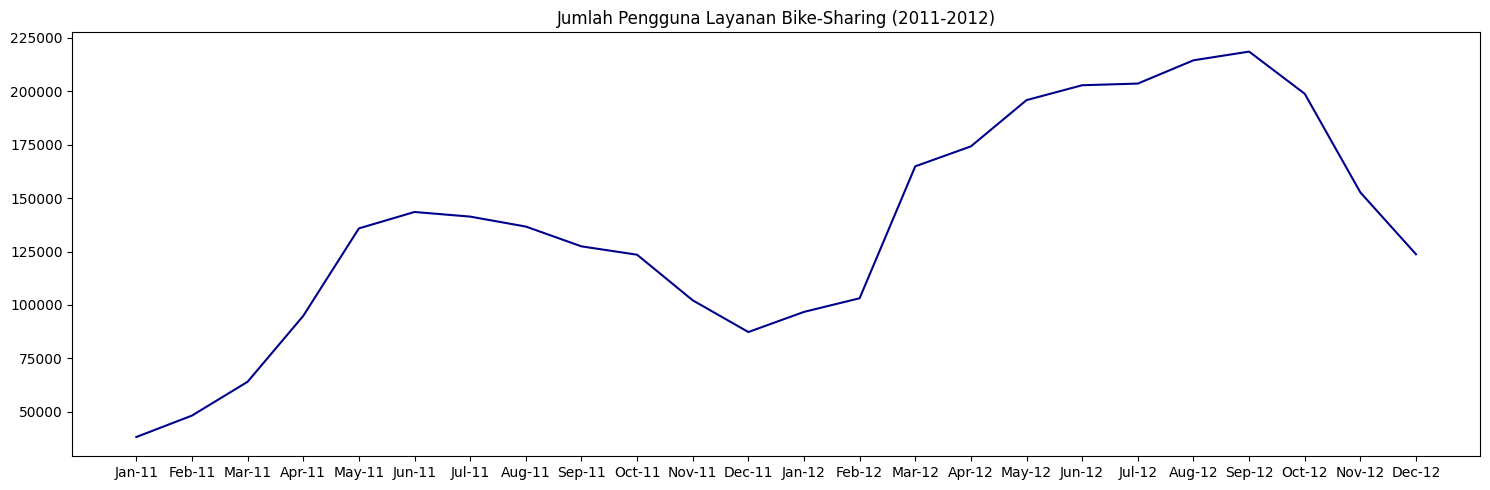

In [29]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=monthly_users_df,
    x="yearmonth",
    y="cnt",
    color="darkblue",
)

plt.title("Jumlah Pengguna Layanan Bike-Sharing (2011-2012)")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.tight_layout()
plt.show()

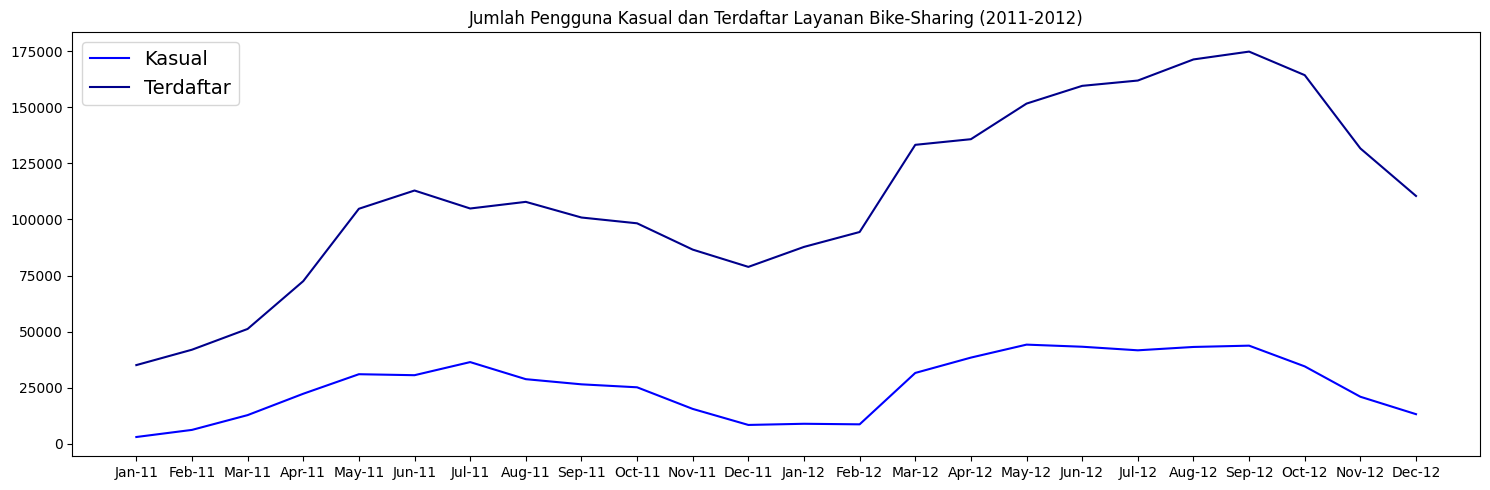

In [30]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=monthly_users_df,
    x="yearmonth",
    y="casual",
    color="blue",
    label="Kasual",
)
sns.lineplot(
    data=monthly_users_df,
    x="yearmonth",
    y="registered",
    color="darkblue",
    label="Terdaftar",
)

plt.title("Jumlah Pengguna Kasual dan Terdaftar Layanan Bike-Sharing (2011-2012)")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.show()

2. Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu dalam Sehari?


In [31]:
hourly_users_df = df.groupby("hr").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)
hourly_users_df = hourly_users_df.reset_index()
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


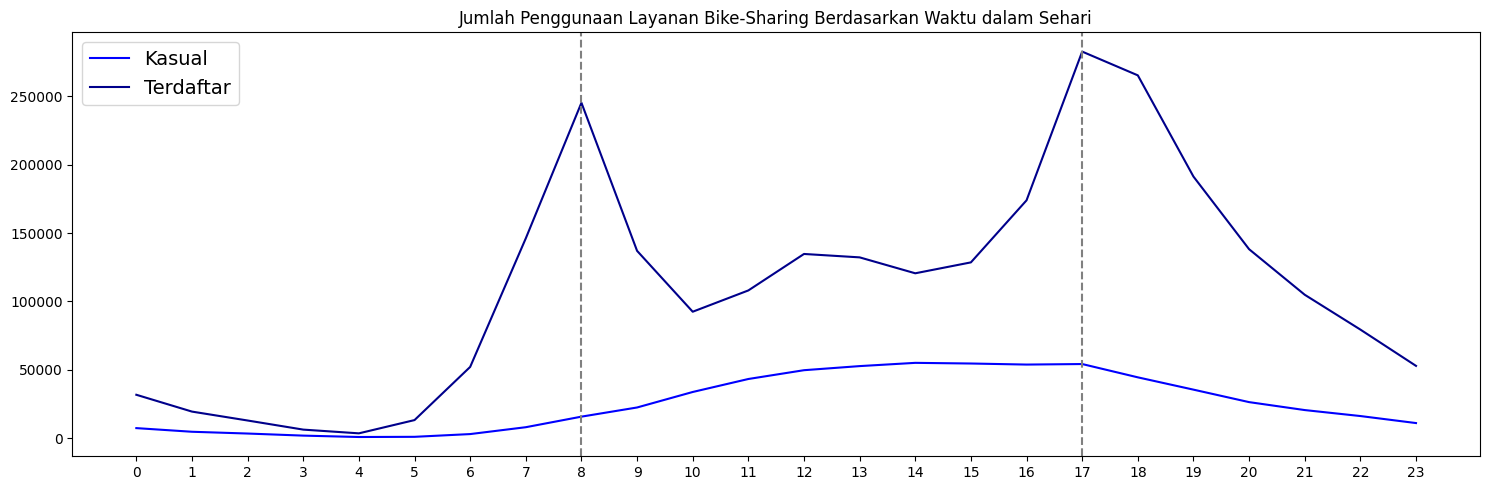

In [32]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    data=hourly_users_df,
    x="hr",
    y="casual",
    color="blue",
    label="Kasual",
)
sns.lineplot(
    data=hourly_users_df,
    x="hr",
    y="registered",
    color="darkblue",
    label="Terdaftar",
)

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.axvline(x=8, color="gray", linestyle="dashed")
plt.axvline(x=17, color="gray", linestyle="dashed")

plt.title("Jumlah Penggunaan Layanan Bike-Sharing Berdasarkan Waktu dalam Sehari")
plt.xlabel(None)  # type: ignore
plt.ylabel(None)  # type: ignore
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.show()

3. Apakah Terdapat Korelasi Antara Suhu dengan Jumlah Pengguna Layanan Bike-Sharing?


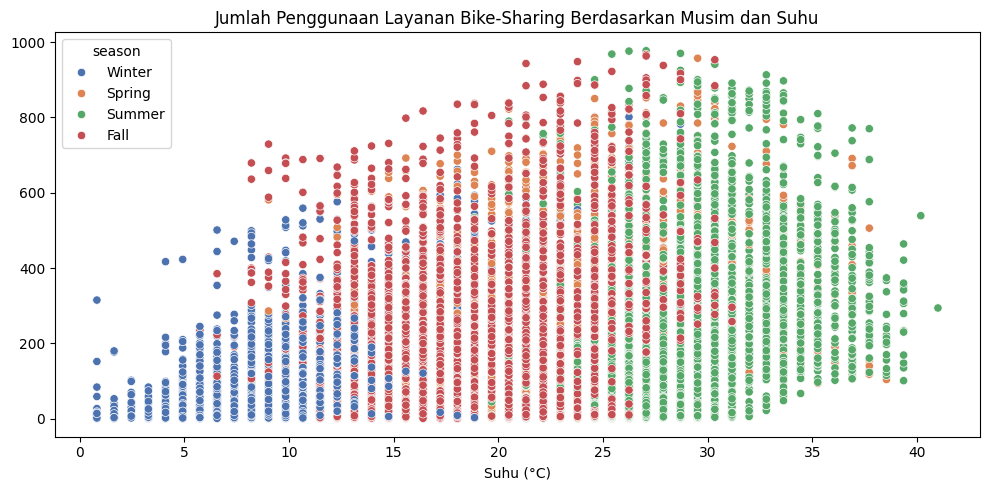

In [33]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x="temp",
    y="cnt",
    hue="season",
    palette="deep",
)

plt.title("Jumlah Penggunaan Layanan Bike-Sharing Berdasarkan Musim dan Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel(None)  # type: ignore
plt.tight_layout()
plt.show()

## Conclusion

1. Bagaimana Tren Jumlah Pengguna Layanan Bike-Sharing dalam Beberapa Tahun Terakhir?
    > Jumlah pengguna pada tahun 2012 lebih tinggi dari tahu 2011. Kedua tahun tersebut menunjukkan tren yang sama, dimana biasanya diawali dengan jumlah yang rendah di awal tahun, lalu mulai meningkat di kuartal kedua, kemudian mulai menurut di kuartal keempat.
2. Bagaimana Pola Penggunaan Layanan Bike-Sharing Berdasarkan Waktu dalam Sehari?
    > Untuk pengguna terdaftar, jumlah penggunaan layanan mencapai titik puncaknya pada jam 08:00 dan 17:00, hal ini dimungkinkan karena pengguna terdaftar menggunakan sepeda untuk berangkat dan pulang kerja. Sedangkan untuk pengguna kasual, jumlah penggunaan layanan mulai meningkat setelah jam 06:00 dan mulai menurun setelah jam 17:00.
3. Apakah Terdapat Korelasi Antara Suhu dengan Jumlah Pengguna Layanan Bike-Sharing?
    > Ya, terdapat korelasi yang cukup kuat. Jumlah penggunaan layanan paling rendah terjadi pada suhu yang lebih dingin selama musim dingin dan mulai meningkat seiring meningkatnya suhu. Namun, terdapat kisaran suhu dimana jumlah penggunaan layanan paling tinggi, yaitu antara 20°C hingga 30°C. Sehingga, pada waktu-waktu dengan kisaran suhu seperti itu, diharapkan jumlah penggunaan layanan bike-sharing menjadi lebih tinggi.
